In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output

In [2]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline

# Q1: How do plan rates and benefits vary across states?

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
CostShare_df = pd.read_csv("BenefitsCostSharing.csv")

Lets take a look at how this dataset looksm'm

In [23]:
CostShare_df.head(5)

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


Lets find out which columns do not have null values and lets fill out empty records from our dataset

In [6]:
# Fill empty and NaNs values with NaN
CostShare_df = CostShare_df.fillna(np.nan)

# Check for Null values
CostShare_df.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

In [42]:
CostShare_df.shape

(5048408, 32)

In [7]:
print ('Total records in file:%d' %CostShare_df.BenefitName.count())
print ('Unique benefits pesent in the file:%d' %CostShare_df.BenefitName.nunique())

Total records in file:5048408
Unique benefits pesent in the file:861


So we have total 861 type of different plans sold in USA in the year 2014 to 2016

In [8]:
### lets Summarize data
# Summary and statistics
CostShare_df.describe()

,BusinessYear,IssuerId,IssuerId2,LimitQty,MinimumStay,RowNumber,VersionNum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


In [9]:
v_features = CostShare_df.iloc[:,0:32].columns
for i, cn in enumerate(CostShare_df[v_features]):
    print(i,cn)
    print(CostShare_df[cn].describe())
    print("-"*40)

0 BenefitName
count                 5048408
unique                    861
top       Orthodontia - Adult
freq                    77377
Name: BenefitName, dtype: object
----------------------------------------
1 BusinessYear
count    5.048408e+06
mean     2.015127e+03
std      7.563664e-01
min      2.014000e+03
25%      2.015000e+03
50%      2.015000e+03
75%      2.016000e+03
max      2.016000e+03
Name: BusinessYear, dtype: float64
----------------------------------------
2 CoinsInnTier1
count                              3934561
unique                                 115
top       20% Coinsurance after deductible
freq                                673204
Name: CoinsInnTier1, dtype: object
----------------------------------------
3 CoinsInnTier2
count             476821
unique                37
top       Not Applicable
freq              185524
Name: CoinsInnTier2, dtype: object
----------------------------------------
4 CoinsOutofNet
count     3934561
unique         60
top          100%

Lets Analyze which benefit type topping the chart in a given business year

In [10]:
CostShare_df[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                            
                   count unique                           top   freq
BusinessYear                                                        
2014             1164869    496  Dental Check-Up for Children  18719
2015             2079286    517           Orthodontia - Adult  31269
2016             1804253    429           Orthodontia - Adult  27389

Lets Analyze benefit penetration statewise . Below code will help us to get the intermediate variables required to plot the data

In [11]:
CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Unique_State = CostShare_df.StateCode.unique()
benefitarray = []

for state in Unique_State:
    state_benefit =  len(CostShare_df[CostShare_df["StateCode"] == state])    
    benefitarray.append(state_benefit)   

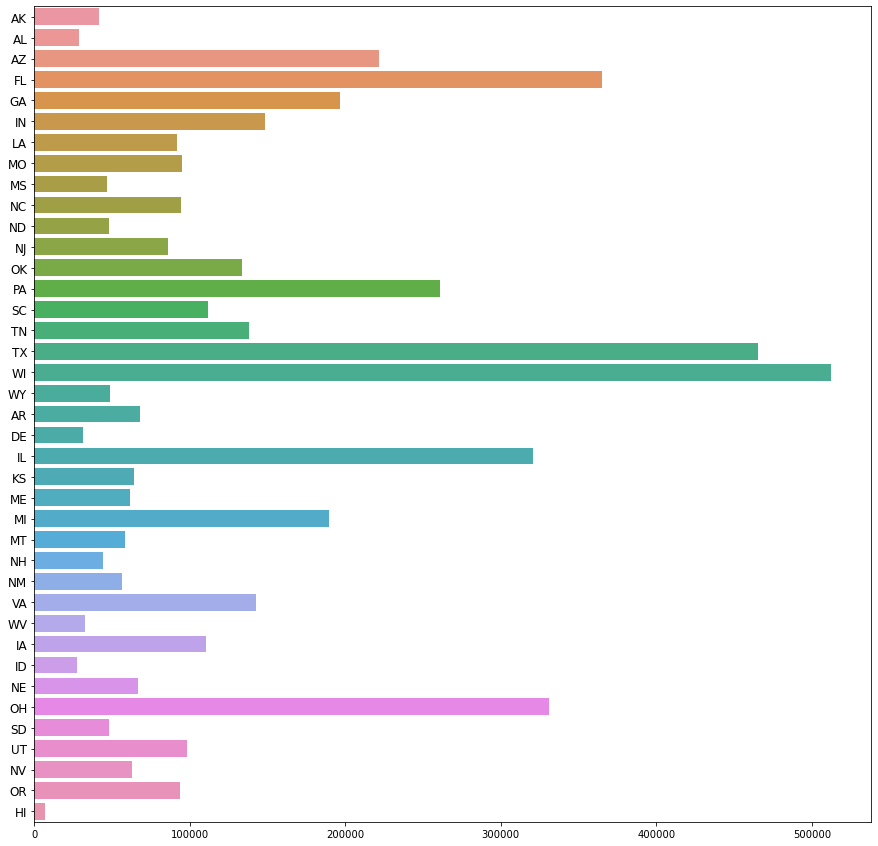

In [24]:
f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(Unique_State, rotation='horizontal', fontsize='large')
g = sns.barplot(y = Unique_State,x=benefitarray)
plt.show()

Grapth produced above may become diffficult to read since it is not in sorted order of benefit plans sold statewise. Lets add few lines of code again to get desired graphical presentation to read benefitplan sold in descending order statewise.

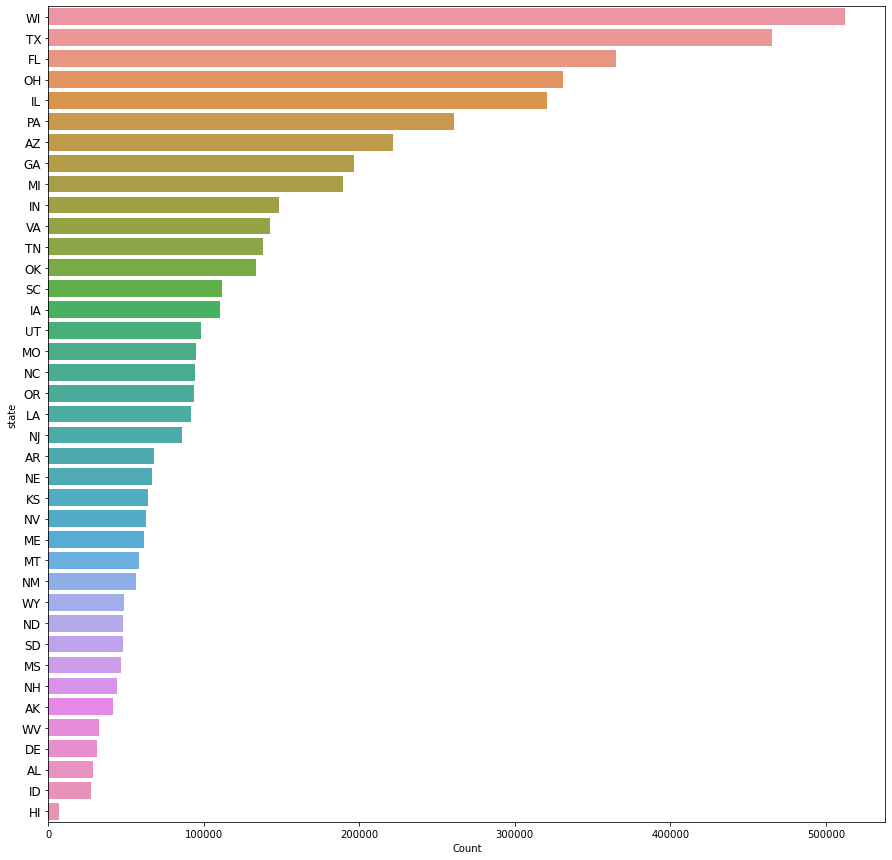

In [13]:
df = pd.DataFrame(
    {'state': Unique_State,
     'Count' : benefitarray
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.show()

In [14]:
CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              41320     84              Orthodontia - Adult   720
AL              28417    115        Major Dental Care - Adult   653
AR              68064     93              Orthodontia - Adult  1077
AZ             221612    195        Major Dental Care - Adult  3345
DE              31370    110        Major Dental Care - Adult   602
FL             364742    194                Accidental Dental  5130
GA             196579    151                Accidental Dental  2893
HI               6741     76        Basic Dental Care - Adult   110
IA             110221    104              Orthodontia - Adult  1727
ID              27313     71              Orthodontia - Adult   447
IL             320533    157        Basic Dental Care - Adult  4299
IN             148531    109              Orthodontia - Child  2347
KS              64279     82  Routine Dental Services (Adult)  1087
LA              91816    125              Orthodontia - Child  1491
ME              61834     99              Orthodontia - Adult   975
MI             189225    205  Routine Dental Services (Adult)  3248
MO              95152    127  Routine Dental Services (Adult)  1577
MS              46895    104        Basic Dental Care - Adult   725
MT              58132     75        Basic Dental Care - Child  1049
NC              94290     98                Accidental Dental  1537
ND              48269     77        Basic Dental Care - Child   974
NE              66935     90                Accidental Dental  1238
NH              44305     98        Major Dental Care - Child   707
NJ              86107    100        Basic Dental Care - Child  1357
NM              56669     78  Routine Dental Services (Adult)   828
NV              62743    121        Basic Dental Care - Adult   930
OH             331045    193              Orthodontia - Adult  5092
OK             133639     83        Major Dental Care - Child  2136
OR              93502    123              Orthodontia - Adult  1344
PA             260866    157        Basic Dental Care - Child  4208
SC             111907     85        Basic Dental Care - Adult  1817
SD              47730     79        Basic Dental Care - Child   843
TN             138154    129  Routine Dental Services (Adult)  2073
TX             465164    180              Orthodontia - Child  6441
UT              98421    101        Major Dental Care - Child  1527
VA             142236    145     Dental Check-Up for Children  2256
WI             512587    146              Orthodontia - Child  7135
WV              32638     77              Orthodontia - Adult   625
WY              48425     92              Orthodontia - Child   807

Lets understanf what is Copay and Coinsurance here along with In network and Out of network since we will be dealing with these features.

Copay :- Copayment is a payment defined in an insurance policy and paid by an insured person each time a medical service is accessed.

#### Additional Information on Deductible to understand Coinsurance better

Deductible :- suppose you are in a calender year 2017 , and your policy says you must spend dollar 5000 first to start availing the benefits from you policy . Lets assume you spent dollar5000 by month of March. now Coinsurance plays a major role after that . (Note:- Coinsurance is expressed in percentage)

Coinsurance :- After you have spent your deductible and again you are in need to avail medical service this time you visit doctor again , you pay your fixed copay amount but rest other expenses will be shared by your Payer (company from which you purchased your plan). suppose you have coninsurance of 20% and your total cost is 100 ,soyouwillspend 20 and remaining 80% will i,e. dollar 80 will paid by payer.

#### One more additional concept to make you understand how long we should follow this Coinsurance



Lets understanf what is Copay and Coinsurance here along with In network and Out of network since we will be dealing with these features.

Copay :- Copayment is a payment defined in an insurance policy and paid by an insured person each time a medical service is accessed.

Additional Information on Deductible to understand Coinsurance better

Deductible :- suppose you are in a calender year 2017 , and your policy says you must spend dollar 5000 first to start availing the benefits from you policy . Lets assume you spent dollar5000 by month of March. now Coinsurance plays a major role after that . (Note:- Coinsurance is expressed in percentage)

Coinsurance :- After you have spent your deductible and again you are in need to avail medical service this time you visit doctor again , you pay your fixed copay amount but rest other expenses will be shared by your Payer (company from which you purchased your plan). suppose you have coninsurance of 20% and your total cost is 100 ,soyouwillspend 20 and remaining 80% will i,e. dollar 80 will paid by payer.

One more additional concept to make you understand how long we should follow this Coinsurance

Out of pocket limit :- We have this limit to make your Helathcare payer take 100% resonsibility of of your medical services. Suppose you keep on paying coinsurance till some month for the calender year 2017 . Suppose by end month October you spent dollar 10000 (your Deductible spent till march from above example + Copay paid till date from jan or start of calender year + Coinsurance you started after march i.e. after exhausting your deductible till march )

Out of poclet $10000 < (Deductible + Copay + Coinsurance ) If this condition gets satisfied your Healthcare (Payer) pays 100% of your medical expense after that for that calender year .

All these benefits resets again back to what they were in previous year for new calender year and you start paying your deductibles and coinsurance again :) Unless you have renewal plans in effect.

In Network :- Avaialing medical services from the hospitals and labs who are associated with your healthcare Payers.

Our Network :- Avaialing medical services from the hospitals and labs who are not associated with your healthcare Payers.

benefit plan costs are mostly higher for out of network services than benefit plan cost of in netwrok services.

Small help from google to know what is Tier based Copay and Coinsurance. read below lines on different tiers available.

Tier 1 always carries the lowest copay and typically applies only to generic drugs. Tier 2 is often for "preferred" brand-name drugs. Tier 3 is often for "non-preferred" brand names. Tier 4 is for usually for "specialty" drugs, meaning very expensive ones and those used to treat rare conditions.

In [15]:
#Coinsurance
print('Coinsurance details')
print(CostShare_df.CoinsInnTier1.unique())
print('*'*50)
print(CostShare_df.CoinsInnTier2.unique())
print('*'*50)
print(CostShare_df.CoinsOutofNet.unique())
print('_'*50)
print('_'*50)

Coinsurance details
['20%' '40%' '50%' nan '0%' '30%' '50% Coinsurance after deductible'
 '100% Coinsurance after deductible' '80% Coinsurance after deductible'
 'No Charge' '20% Coinsurance after deductible'
 '40% Coinsurance after deductible' '30% Coinsurance after deductible'
 '60% Coinsurance after deductible' 'No Charge after deductible'
 '45% Coinsurance after deductible' '65% Coinsurance after deductible'
 '100%' '15%' '45%' '35%' '0% Coinsurance after deductible'
 '70% Coinsurance after deductible' '10% Coinsurance after deductible'
 '10%' '35% Coinsurance after deductible'
 '15% Coinsurance after deductible' '5% Coinsurance after deductible' '$0'
 '25%' '65%' '25% Coinsurance after deductible' '5%' '60%' '13%' '18%'
 '18% Coinsurance after deductible' '21%' '55%'
 '55% Coinsurance after deductible' '16% Coinsurance after deductible'
 '9% Coinsurance after deductible' '3% Coinsurance after deductible' '80%'
 '90%' '12%' '33%' '90% Coinsurance after deductible'
 '85% Coinsurance

In [25]:
CoinsInnTier1 = []
YearBusiness = []
StateCode = []
CoinsInnTier1_real = np.asarray(CostShare_df.CoinsInnTier1)
            
for i, cn in enumerate(CoinsInnTier1_real):
    if (str(cn) == 'nan' or str(cn) == '$0' or str(cn) == 'Not Applicable') :
        continue     
    else:
        if  cn.replace("%","").strip().split(' ')[0] != 'No' :
            CoinsInnTier1.append(cn.replace("%","").strip().split(' ')[0])
            YearBusiness.append(CostShare_df.BusinessYear[i])
            StateCode.append(CostShare_df.StateCode[i])

Differet ways to get Top frequent Coinsurance 1) using Value_counts method 2) write complex function

In [17]:
# 1) use Value_counts method
CoinsInnTier1
CoinsInnTier1 = pd.to_numeric(CoinsInnTier1, errors='coerce')
Codf = pd.DataFrame(
    {'Coinsurance1': CoinsInnTier1,
      'YearBusiness' : YearBusiness,
      'StateCode' : StateCode
     })
Codf['Coinsurance1'].value_counts().head(5)

0     872967
20    699602
30    353429
50    221323
10    208094
Name: Coinsurance1, dtype: int64

In [18]:
Codf.groupby('YearBusiness').sum()

,Coinsurance1
YearBusiness,
2014,11196497
2015,18985158
2016,16426782


In [19]:
# 2) write complex function

Coinsarray = []

Unique_Coinsurance = Codf.Coinsurance1.unique()
for Coinsurance in Unique_Coinsurance:
    Freq_Coinsurance =  len(Codf[Codf["Coinsurance1"] == Coinsurance])    
    Coinsarray.append(Freq_Coinsurance) 

Below piece of code will show Coinsurance with their frequency .

In [20]:
Coins_df = pd.DataFrame(
    {'Coinsurance': Unique_Coinsurance,
     'Coinsfrequency' : Coinsarray
     })

Coins_df = Coins_df.sort_values("Coinsfrequency", ascending=False).reset_index(drop=True)

Coins_df

,Coinsurance,Coinsfrequency
0,0,872967
1,20,699602
2,30,353429
3,50,221323
4,10,208094
...,...,...
64,47,4
65,29,3
66,56,2
67,43,2


Lets visualize the yearwise Coinsurance distribution using Distplot

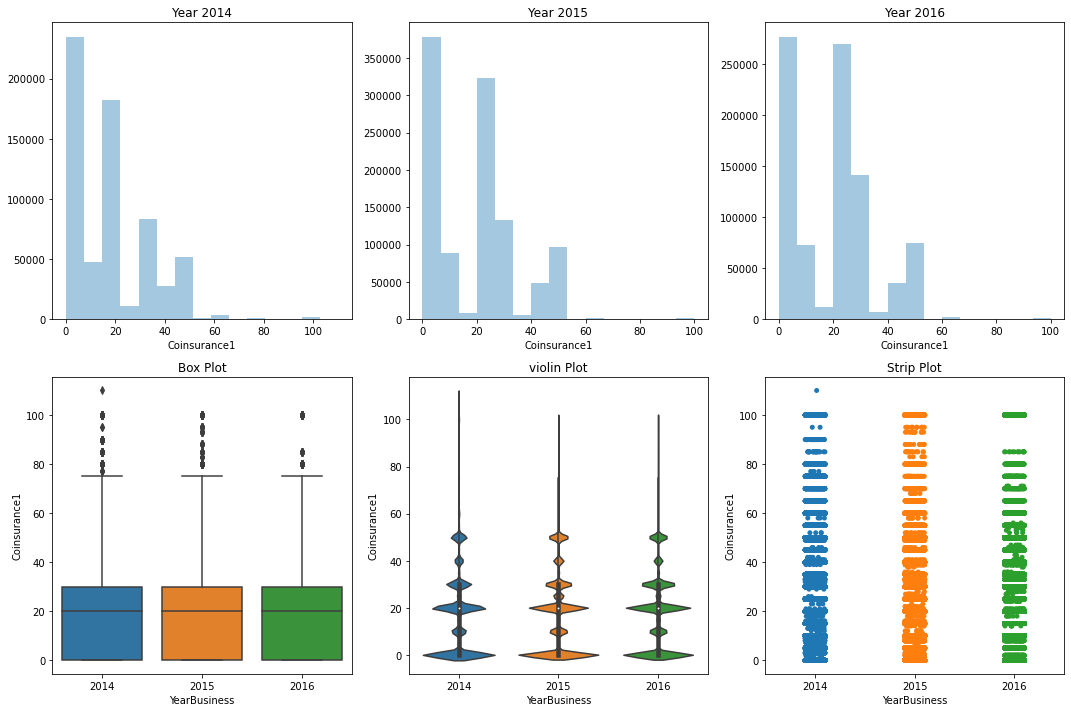

In [21]:
#sns.distplot(Codf['Coinsurance1'],kde=False,bins=15)

fig, ax = plt.subplots(figsize=(15,10), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .8     # the amount of width reserved for blank space between subplots
hspace =  1.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.0

ax[0][0].set_title("Year 2014", y = y_title_margin)
ax[0][1].set_title("Year 2015", y = y_title_margin)
ax[0][2].set_title("Year 2016", y = y_title_margin)
ax[1][0].set_title("Box Plot", y = y_title_margin)
ax[1][1].set_title("violin Plot", y = y_title_margin)
ax[1][2].set_title("Strip Plot", y = y_title_margin)

sns.distplot(Codf[Codf['YearBusiness'] == 2014]['Coinsurance1'],kde=False,bins=15,ax=ax[0][0])
sns.distplot(Codf[Codf['YearBusiness'] == 2015]['Coinsurance1'],kde=False,bins=15,ax=ax[0][1])
sns.distplot(Codf[Codf['YearBusiness'] == 2016]['Coinsurance1'],kde=False,bins=15,ax=ax[0][2])
sns.boxplot(x='YearBusiness',y='Coinsurance1',data=Codf,ax=ax[1][0])
sns.violinplot(x='YearBusiness',y='Coinsurance1',data=Codf,ax=ax[1][1])
sns.stripplot(x='YearBusiness',y='Coinsurance1',data=Codf,jitter=True,ax=ax[1][2])
plt.tight_layout()

Another simple way to get yearwise Coinsurance distribution

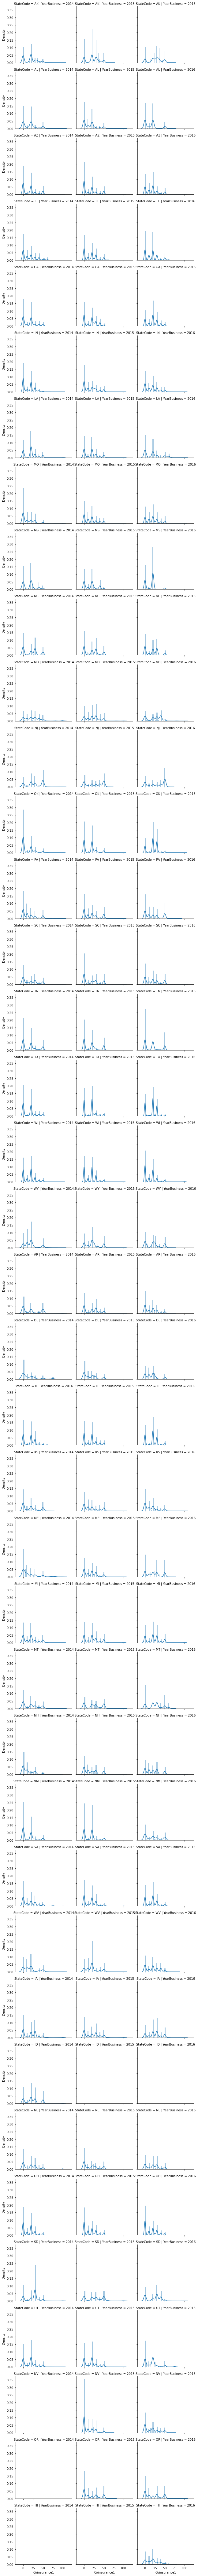

In [22]:
g = sns.FacetGrid(data=Codf,row='StateCode',col='YearBusiness')
g.map(sns.distplot,'Coinsurance1')

In [26]:
CostShare_df

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048403,Major Dental Care - Child,2016,50% Coinsurance after deductible,NaN,50% Coinsurance after deductible,Not Applicable,NaN,Not Applicable,NaN,NaN,...,NaN,NaN,96480WV0110003-00,NaN,112,SERFF,96480WV0110003,WV,WV,2
5048404,Basic Dental Care - Adult,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96480WV0110003-00,NaN,113,SERFF,96480WV0110003,WV,WV,2
5048405,Orthodontia - Adult,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96480WV0110003-00,NaN,114,SERFF,96480WV0110003,WV,WV,2
5048406,Major Dental Care - Adult,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96480WV0110003-00,NaN,115,SERFF,96480WV0110003,WV,WV,2


# Q2: How do plan benefits relate to plan rates?

In [30]:
network = pd.read_csv("Network.csv")
plan_attribute = pd.read_csv("PlanAttributes.csv")
serve_area = pd.read_csv("ServiceArea.csv")
rate = pd.read_csv("Rate.csv")
business_rule = pd.read_csv("BusinessRules.csv")

In [31]:
network.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,StateCode2,NetworkName,NetworkId,NetworkURL,RowNumber,MarketCoverage,DentalOnlyPlan
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,AK,ODS Premier,AKN001,https://www.modahealth.com/ProviderSearch/face...,13,NaN,NaN
1,2014,AK,38344,HIOS,6,2013-08-28 08:15:53,38344,AK,HeritagePlus,AKN001,https://www.premera.com/wa/visitor/,13,NaN,NaN
2,2014,AK,38536,HIOS,2,2013-08-01 12:48:00,38536,AK,Lincoln Dental Connect,AKN001,http://lfg.go2dental.com/member/dental_search/...,13,NaN,NaN
3,2014,AK,42507,HIOS,3,2013-09-02 11:39:25,42507,AK,DentalGuard Preferred,AKN001,https://www.guardiananytime.com/fpapp/FPWeb/de...,13,NaN,NaN
4,2014,AK,73836,HIOS,6,2014-04-18 11:49:29,73836,AK,Moda Plus AK Regional,AKN001,https://www.modahealth.com/ProviderSearch/face...,13,NaN,NaN


In [32]:
plan_attribute.head(5)

,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,...,TEHBOutOfNetFamilyMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,VersionNum,WellnessProgramOffered
0,NaN,0,0,1,2014,Standard Low Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
1,NaN,0,0,1,2014,Standard Low On Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
2,NaN,0,0,1,2014,Standard High Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
3,NaN,0,0,1,2014,Standard Low Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/mymoda/,https://www.modahealth.com/pdfs/plans/individu...,NaN,6,NaN
4,NaN,0,0,1,2014,Standard Low On Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/mymoda/,https://www.modahealth.com/pdfs/plans/individu...,NaN,6,NaN


In [33]:
serve_area.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,StateCode2,ServiceAreaId,ServiceAreaName,CoverEntireState,County,PartialCounty,ZipCodes,PartialCountyJustification,RowNumber,MarketCoverage,DentalOnlyPlan
0,2014,PA,22444,HIOS,9,2014-01-21 08:29:49,22444,PA,PAS001,Geisinger Health Plan,No,42103.0,No,NaN,NaN,42,NaN,NaN
1,2014,PA,22444,HIOS,9,2014-01-21 08:29:49,22444,PA,PAS001,Geisinger Health Plan,No,42105.0,No,NaN,NaN,43,NaN,NaN
2,2014,PA,22444,HIOS,9,2014-01-21 08:29:49,22444,PA,PAS001,Geisinger Health Plan,No,42107.0,No,NaN,NaN,44,NaN,NaN
3,2014,PA,22444,HIOS,9,2014-01-21 08:29:49,22444,PA,PAS001,Geisinger Health Plan,No,42109.0,No,NaN,NaN,45,NaN,NaN
4,2014,PA,22444,HIOS,9,2014-01-21 08:29:49,22444,PA,PAS001,Geisinger Health Plan,No,42111.0,No,NaN,NaN,46,NaN,NaN


In [35]:
business_rule.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,TIN,ProductId,StandardComponentId,...,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,CohabitationRule,RowNumber,MarketCoverage,DentalOnlyPlan
0,2014,AL,82285,HIOS,7,2014-01-21 08:29:49,82285,94-2761537,NaN,82285AL0010006,...,26,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,No;Adopted Child,No;Foster Child,No;War...",14,NaN,NaN
1,2014,AL,82285,HIOS,7,2014-01-21 08:29:49,82285,94-2761537,NaN,82285AL0020001,...,Not Applicable,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Adopted Child,Yes;Foster Child,Yes;Stepson or ...",15,NaN,NaN
2,2014,AL,82285,HIOS,7,2014-01-21 08:29:49,82285,94-2761537,NaN,82285AL0020002,...,Not Applicable,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Adopted Child,Yes;Foster Child,Yes;Stepson or ...",16,NaN,NaN
3,2014,AL,82285,HIOS,7,2014-01-21 08:29:49,82285,94-2761537,NaN,82285AL0020004,...,26,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,No;Adopted Child,No;Foster Child,No;War...",17,NaN,NaN
4,2014,AL,82285,HIOS,7,2014-01-21 08:29:49,82285,94-2761537,NaN,82285AL0020006,...,26,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,No;Adopted Child,No;Foster Child,No;War...",18,NaN,NaN


# Q3: How do plan rates vary by age?

In [40]:
rate.head(3)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15


In [39]:
rate.isnull().sum()

BusinessYear                                        0
StateCode                                           0
IssuerId                                            0
SourceName                                          0
VersionNum                                          0
ImportDate                                          0
IssuerId2                                           0
FederalTIN                                          0
RateEffectiveDate                                   0
RateExpirationDate                                  0
PlanId                                              0
RatingAreaId                                        0
Tobacco                                             0
Age                                                 0
IndividualRate                                      0
IndividualTobaccoRate                         7762096
Couple                                       12653504
PrimarySubscriberAndOneDependent             12653504
PrimarySubscriberAndTwoDepen

In [59]:
q3df = pd.concat([CostShare_df, rate], axis=0,keys = ["IssuerId","IssuerId2"])

In [61]:
CostShare_df["StateCode"]

0          AK
1          AK
2          AK
3          AK
4          AK
           ..
5048403    WV
5048404    WV
5048405    WV
5048406    WV
5048407    WV
Name: StateCode, Length: 5048408, dtype: object

In [62]:
q3df.head(3)

BenefitName  BusinessYear CoinsInnTier1  \
IssuerId 0  Routine Dental Services (Adult)          2014           20%   
         1     Dental Check-Up for Children          2014           20%   
         2        Basic Dental Care - Child          2014           40%   

           CoinsInnTier2 CoinsOutofNet CopayInnTier1 CopayInnTier2  \
IssuerId 0           NaN           20%     No Charge           NaN   
         1           NaN           20%     No Charge           NaN   
         2           NaN           40%     No Charge           NaN   

           CopayOutofNet         EHBVarReason Exclusions  ...  Age  \
IssuerId 0     No Charge            Above EHB        NaN  ...  NaN   
         1     No Charge  Substantially Equal        NaN  ...  NaN   
         2     No Charge  Substantially Equal        NaN  ...  NaN   

           IndividualRate IndividualTobaccoRate Couple  \
IssuerId 0            NaN                   NaN    NaN   
         1            NaN                   NaN    NaN   
         2            NaN                   NaN    NaN   

           PrimarySubscriberAndOneDependent PrimarySubscriberAndTwoDependents  \
IssuerId 0                              NaN                               NaN   
         1                              NaN                               NaN   
         2                              NaN                               NaN   

           PrimarySubscriberAndThreeOrMoreDependents CoupleAndOneDependent  \
IssuerId 0                                       NaN                   NaN   
         1                                       NaN                   NaN   
         2                                       NaN                   NaN   

           CoupleAndTwoDependents  CoupleAndThreeOrMoreDependents  
IssuerId 0                    NaN                             NaN  
         1                    NaN                             NaN  
         2                    NaN                             NaN  

[3 rows x 47 columns]

In [65]:
CostShare_df.shape

(5048408, 32)

In [63]:
feature = ["StateCode","BenefitName","Age"]

In [64]:
q3df[feature]

StateCode                      BenefitName          Age
IssuerId  0               AK  Routine Dental Services (Adult)          NaN
          1               AK     Dental Check-Up for Children          NaN
          2               AK        Basic Dental Care - Child          NaN
          3               AK              Orthodontia - Child          NaN
          4               AK        Major Dental Care - Child          NaN
...                      ...                              ...          ...
IssuerId2 12694440        WV                              NaN           61
          12694441        WV                              NaN           62
          12694442        WV                              NaN           63
          12694443        WV                              NaN           64
          12694444        WV                              NaN  65 and over

[17742853 rows x 3 columns]

# Q4: How do plans vary across insurance network providers?